### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.


### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv(r"C:\Users\omth0419\Desktop\data fsds\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Preprocessing

In [4]:
#adding the column for region
data['Region']=0
data['Region'][122:]=1

In [5]:
#data[122:]
#data[data['FWI']=='fire   ']
data.drop(index=[122,123,167], inplace=True)

In [6]:
data=data.reset_index(drop=True)
data.columns = data.columns.str.strip ()

In [7]:
data['year'].unique()

array(['2012'], dtype=object)

In [8]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [10]:
data['Classes']=data['Classes'].str.strip().map({'not fire':0,'fire':1})

In [11]:
data['Classes'].unique()

array([0, 1], dtype=int64)

In [12]:
for i in data.columns: data[i]=data[i].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       243 non-null    float64
dtypes: float64(15)
memory usage: 28.6 KB


In [14]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [15]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
data.drop(columns=['year'],inplace=True)

<AxesSubplot:>

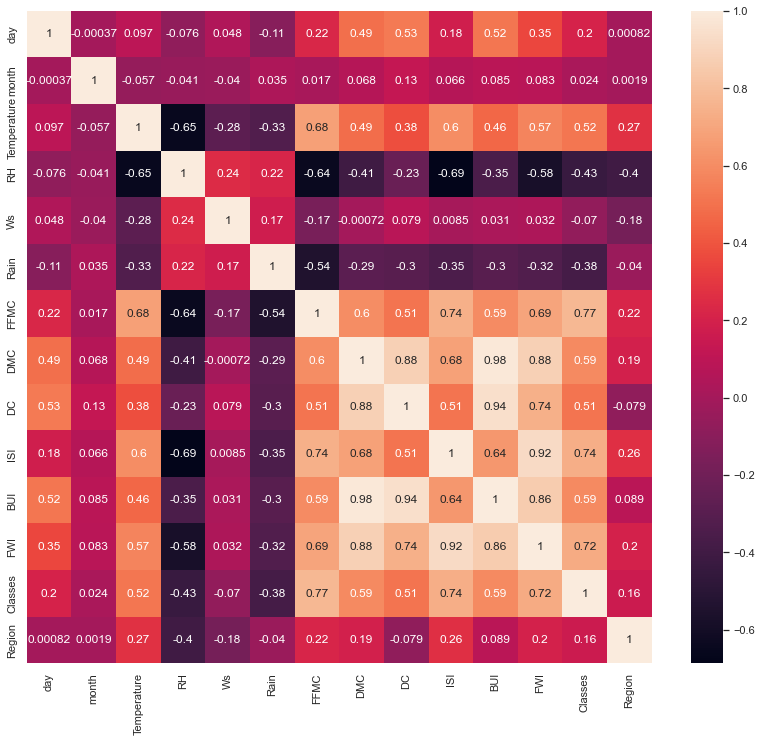

In [17]:
sns.set(rc={'figure.figsize':(14,12)})
sns.heatmap(data.corr(), annot=True)

In [18]:
data.drop('BUI',axis=1, inplace=True)

<AxesSubplot:>

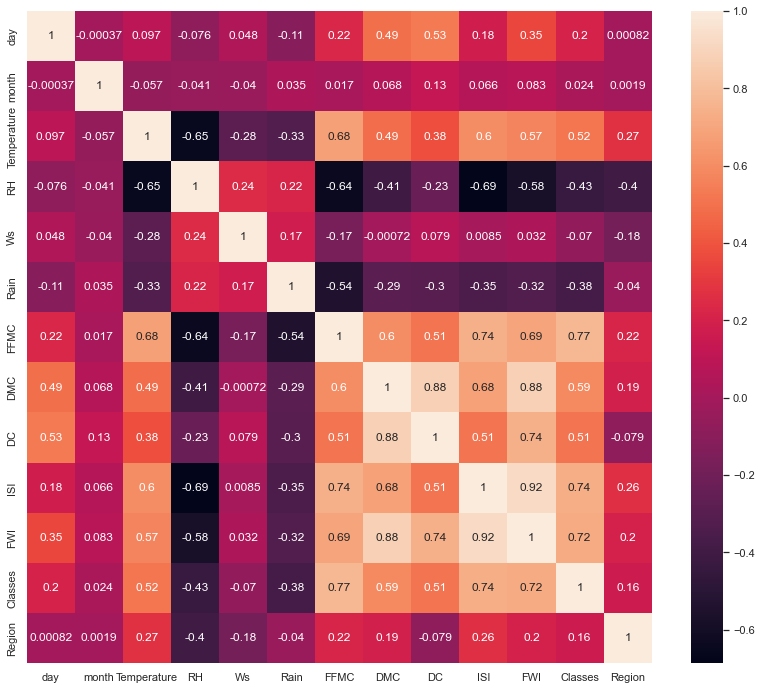

In [19]:
sns.set(rc={'figure.figsize':(14,12)})
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Classes', ylabel='count'>

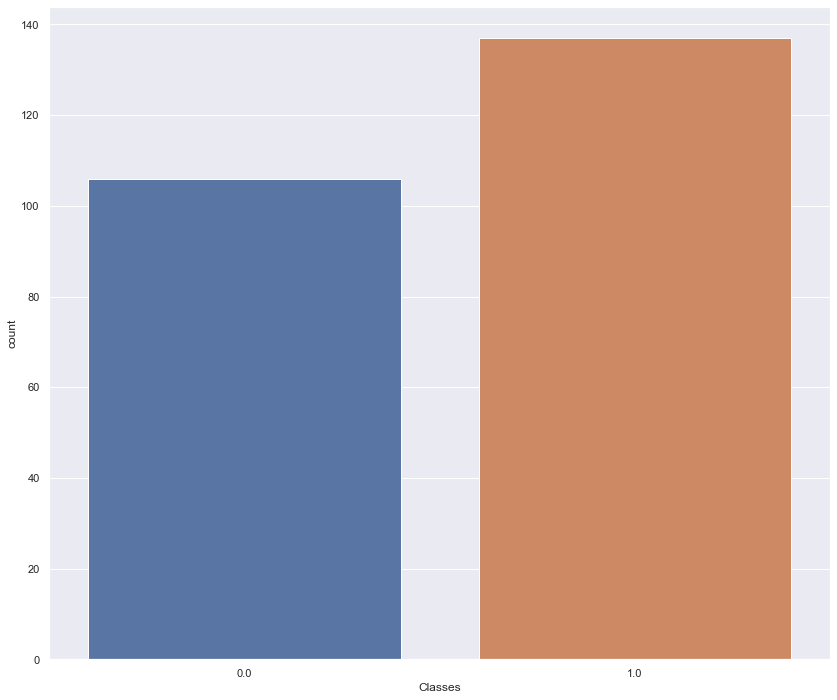

In [20]:
sns.countplot(x="Classes",data=data)

<AxesSubplot:>

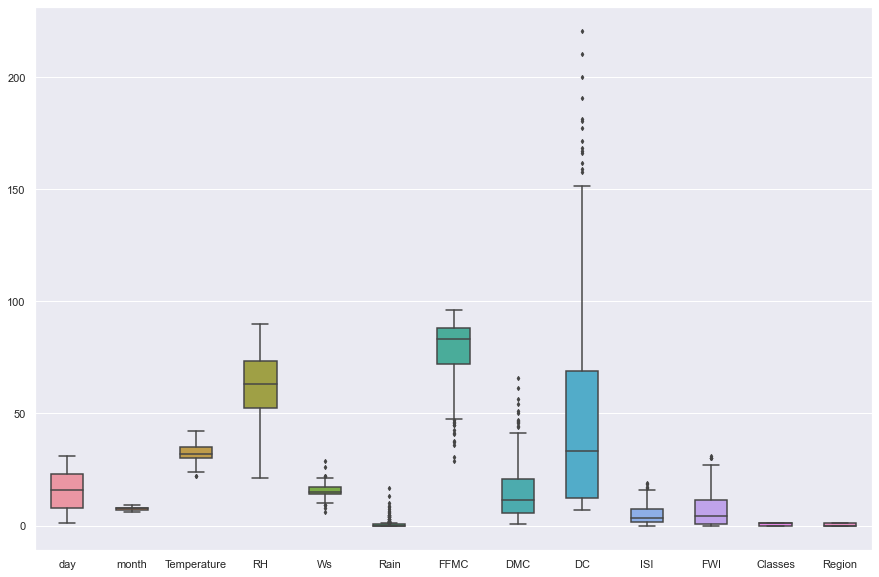

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

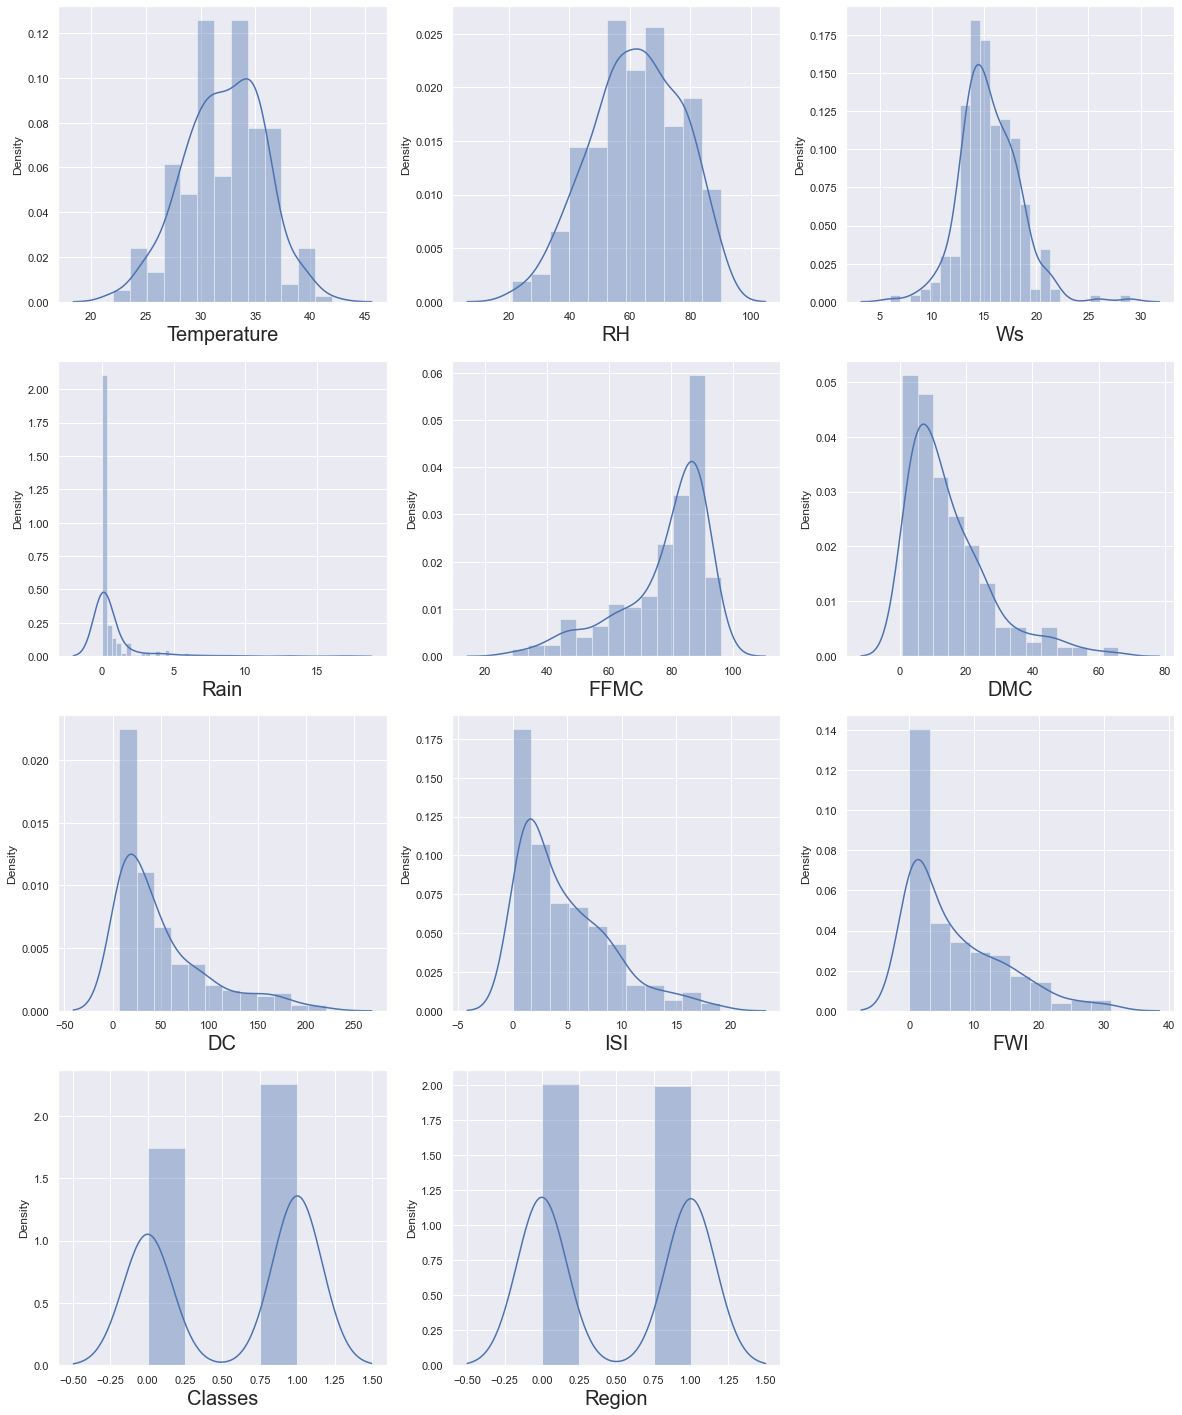

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(columns=['day','month']):
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [23]:
X = data.drop(columns = ['Classes'])
y = data['Classes']

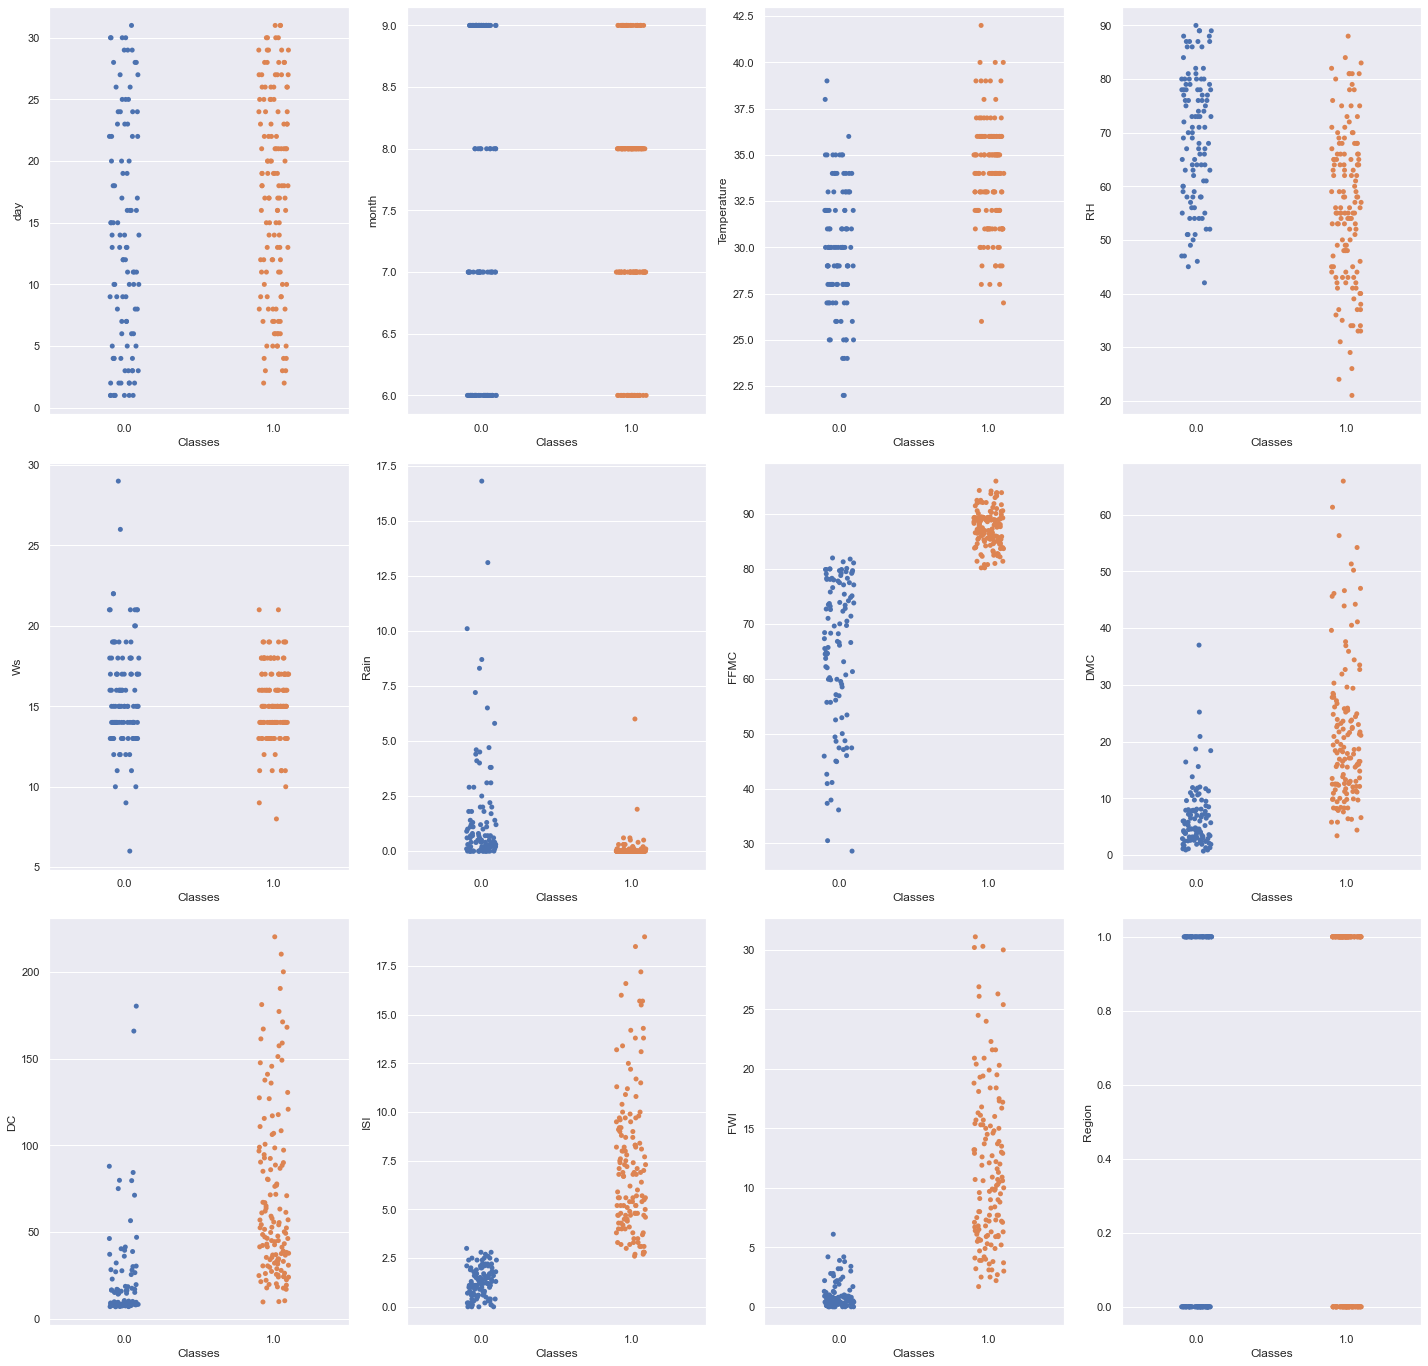

In [24]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<= 15:
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [25]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,6.080458,day
1,40.107874,month
2,103.721666,Temperature
3,34.557693,RH
4,35.100141,Ws
5,1.712122,Rain
6,107.236843,FFMC
7,33.177637,DMC
8,14.549678,DC
9,51.307729,ISI


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60)

In [27]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
X_train.shape

(170, 12)

In [29]:
X_test.shape

(73, 12)

<AxesSubplot:>

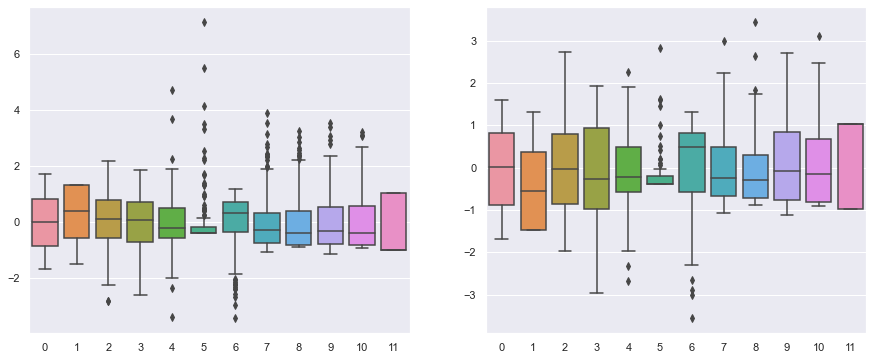

In [30]:
plt.figure(figsize=(15,6), facecolor='white')
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_test)

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
import pickle
# Writing different model files to file
with open( 'LogisticRegmodelPred.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.pkl', 'wb') as f:
    pickle.dump(scaler,f)

In [33]:
with open('LogisticregmodelPred.pkl', 'rb') as f:
    log_reg = pickle.load(f)

In [34]:
y_pred = log_reg.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9726027397260274

In [36]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[29,  1],
       [ 1, 42]], dtype=int64)

In [37]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [38]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9726027397260274

In [39]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9666666666666667

In [40]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9666666666666667

In [41]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9666666666666667

In [42]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9717054263565892

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

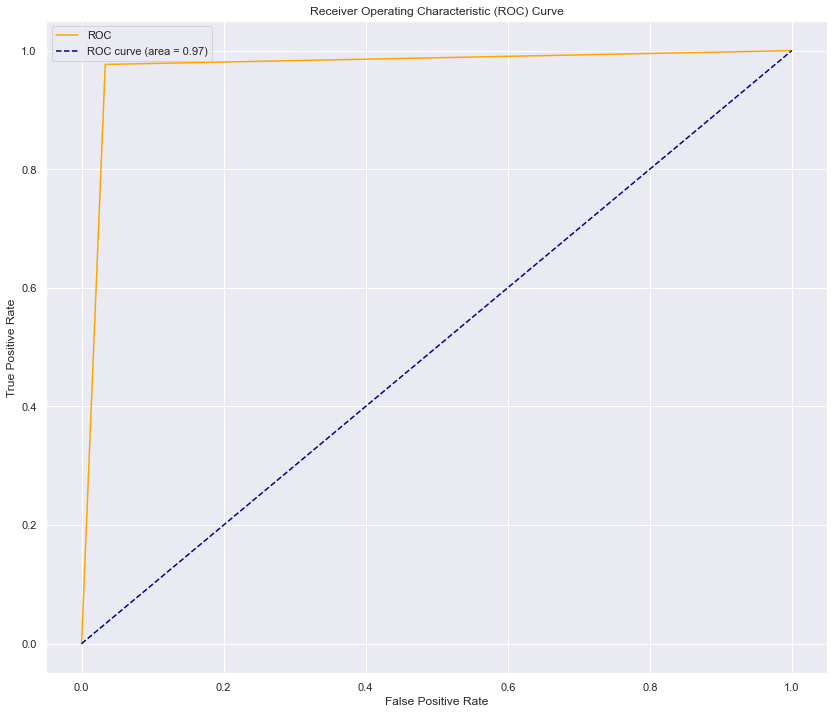

In [44]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()